In [79]:
import pandas as pd
import glob
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def readDf():
    if not os.path.exists('./concat.csv'):
        path = 'C:/Projects/Bootcamp Ödev Cevapları/Untitled Folder/mart-eylül' # get path for all files that used by EDA
        all_files = glob.glob(path + "/*.txt")
        # create empty list and append all files
        file_list = []

        for filename in all_files:
            df = pd.read_csv(filename)
            file_list.append(df)

        # Concatenate all data into one DataFrame that called "mta"
        mta = pd.concat(file_list)
        mta.columns = mta.columns.str.strip() #In case we have some unwanted spaces
        mta.to_csv('concat.csv', index=None)
        return mta
    else:
        return pd.read_csv('concat.csv')

In [3]:
mta = readDf()

In [4]:
mta['DATE_TIME'] = pd.to_datetime(mta["DATE"]+ " " + mta["TIME"], format='%m/%d/%Y %H:%M:%S')
mta['TURNSTILE'] = mta['C/A'] + ' ' + mta['UNIT'] + ' ' + mta['SCP'] + ' ' + mta['STATION']
mta.drop_duplicates(subset=['C/A', 'UNIT', 'SCP', 'STATION', 'DATE_TIME'], inplace=True)

In [5]:
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,03:00:00,REGULAR,7537255,2570434,2021-02-27 03:00:00,A002 R051 02-00-00 59 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,07:00:00,REGULAR,7537260,2570445,2021-02-27 07:00:00,A002 R051 02-00-00 59 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,11:00:00,REGULAR,7537285,2570500,2021-02-27 11:00:00,A002 R051 02-00-00 59 ST
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,15:00:00,REGULAR,7537354,2570546,2021-02-27 15:00:00,A002 R051 02-00-00 59 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,19:00:00,REGULAR,7537501,2570582,2021-02-27 19:00:00,A002 R051 02-00-00 59 ST


In [6]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6279677 entries, 0 to 6279882
Data columns (total 13 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       object        
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  DATE_TIME  datetime64[ns]
 12  TURNSTILE  object        
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 670.7+ MB


In [7]:
mta.shape

(6279677, 13)

In [8]:
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME', 'TURNSTILE'],
      dtype='object')

In [9]:
#Checking null values based on columns

mta.isnull().sum()

C/A          0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DIVISION     0
DATE         0
TIME         0
DESC         0
ENTRIES      0
EXITS        0
DATE_TIME    0
TURNSTILE    0
dtype: int64

In [10]:
mta.describe()

,ENTRIES,EXITS
count,6.279677e+06,6.279677e+06
mean,4.173093e+07,3.346020e+07
std,2.183711e+08,1.926419e+08
min,0.000000e+00,0.000000e+00
25%,2.188090e+05,9.744800e+04
50%,1.424042e+06,8.612790e+05
75%,6.052079e+06,3.990674e+06
max,2.147432e+09,2.133797e+09


In [11]:
mta['DESC'].value_counts()

REGULAR       6252548
RECOVR AUD      27129
Name: DESC, dtype: int64

In [12]:
##So we don't want the recovered audits. We want regular ones.
#mta= pd.DataFrame(mta[mta.DESC=='REGULAR'])

In [13]:
mta['DESC'].value_counts()

REGULAR       6252548
RECOVR AUD      27129
Name: DESC, dtype: int64

In [14]:
mta['ENTRIES'] = mta['ENTRIES'].astype('int')
mta['EXITS'] = mta['EXITS'].astype('int')

In [15]:
mta['WEEKDAY'] = mta["DATE_TIME"].dt.day_name()

In [16]:
mta = mta[["STATION","TURNSTILE","DATE","TIME","DATE_TIME","WEEKDAY","ENTRIES","EXITS"]]
mta.sample(5)

,STATION,TURNSTILE,DATE,TIME,DATE_TIME,WEEKDAY,ENTRIES,EXITS
1679854,CANAL ST,A046 R463 00-00-00 CANAL ST,04/26/2021,13:00:00,2021-04-26 13:00:00,Monday,4266928,428766
243167,BEDFORD AV,H010 R235 01-00-01 BEDFORD AV,03/07/2021,07:00:00,2021-03-07 07:00:00,Sunday,1178576,2688808
4677025,BEACH 60 ST,N192 R336 00-00-00 BEACH 60 ST,08/06/2021,16:00:00,2021-08-06 16:00:00,Friday,188435,211852
364603,SPRING ST,R215 R322 00-00-02 SPRING ST,03/10/2021,11:00:00,2021-03-10 11:00:00,Wednesday,14259831,2293614
1121413,FORDHAM RD,N217 R112 00-00-02 FORDHAM RD,04/06/2021,12:00:00,2021-04-06 12:00:00,Tuesday,19398361,4591509


In [17]:
mta = mta

In [18]:
mta.head()

,STATION,TURNSTILE,DATE,TIME,DATE_TIME,WEEKDAY,ENTRIES,EXITS
0,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,03:00:00,2021-02-27 03:00:00,Saturday,7537255,2570434
1,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,07:00:00,2021-02-27 07:00:00,Saturday,7537260,2570445
2,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,11:00:00,2021-02-27 11:00:00,Saturday,7537285,2570500
3,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,15:00:00,2021-02-27 15:00:00,Saturday,7537354,2570546
4,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,19:00:00,2021-02-27 19:00:00,Saturday,7537501,2570582


In [19]:
mta.sort_values(by='DATE_TIME')
mta['NO_OF_ENTRIES']= mta['ENTRIES'].diff()
mta['NO_OF_EXITS']= mta['EXITS'].diff()

In [109]:
mta.describe()

,ENTRIES,EXITS,NO_OF_ENTRIES,NO_OF_EXITS,ENTRIES_Z_SCORES,EXITS_Z_SCORES
count,4.891943e+06,4.891943e+06,4.891943e+06,4.891943e+06,4.891943e+06,4.891943e+06
mean,2.902869e+07,2.219435e+07,1.076650e+06,9.139305e+05,-2.125295e-15,3.096115e-16
std,1.698419e+08,1.436307e+08,3.680266e+07,3.293928e+07,1.000000e+00,1.000000e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.925465e-02,-2.774589e-02
25%,3.849310e+05,2.409170e+05,1.200000e+01,1.400000e+01,-2.925436e-02,-2.774549e-02
50%,2.067457e+06,1.323696e+06,4.200000e+01,4.200000e+01,-2.925354e-02,-2.774464e-02
75%,6.591576e+06,4.642994e+06,1.020000e+02,1.060000e+02,-2.925191e-02,-2.774270e-02
max,2.147432e+09,2.133797e+09,2.147040e+09,2.133741e+09,5.831001e+01,6.475026e+01


In [119]:
mta.sort_values(by='NO_OF_ENTRIES')

,STATION,TURNSTILE,DATE,TIME,DATE_TIME,WEEKDAY,ENTRIES,EXITS,NO_OF_ENTRIES,NO_OF_EXITS,ENTRIES_Z_SCORES,EXITS_Z_SCORES
2904803,QUEENSBORO PLZ,R509 R121 00-00-05 QUEENSBORO PLZ,06/01/2021,04:00:00,2021-06-01 04:00:00,Tuesday,1573818,510062,1.000000e+00,1.0,-0.029255,-0.027746
164094,51 ST,R242A R049 02-00-01 51 ST,03/03/2021,03:00:00,2021-03-03 03:00:00,Wednesday,391160,865129,1.000000e+00,1.0,-0.029255,-0.027746
4547301,FULTON ST,R205A R014 04-02-01 FULTON ST,07/28/2021,05:00:00,2021-07-28 05:00:00,Wednesday,2978284,690975,1.000000e+00,2.0,-0.029255,-0.027746
5592894,WALL ST,R204 R043 02-00-01 WALL ST,09/02/2021,06:00:00,2021-09-02 06:00:00,Thursday,492319,1098826,1.000000e+00,3.0,-0.029255,-0.027746
4547295,FULTON ST,R205A R014 04-02-01 FULTON ST,07/27/2021,05:00:00,2021-07-27 05:00:00,Tuesday,2978015,690837,1.000000e+00,3.0,-0.029255,-0.027746
...,...,...,...,...,...,...,...,...,...,...,...,...
2339622,HEWES ST,J003 R352 00-00-00 HEWES ST,05/15/2021,01:00:00,2021-05-15 01:00:00,Saturday,2147422395,671151133,2.147025e+09,670705666.0,58.309616,20.334133
2130527,HEWES ST,J003 R352 00-00-00 HEWES ST,05/08/2021,01:00:00,2021-05-08 01:00:00,Saturday,2147424891,671149995,2.147029e+09,670706649.0,58.309710,20.334163
1921506,HEWES ST,J003 R352 00-00-00 HEWES ST,05/01/2021,01:00:00,2021-05-01 01:00:00,Saturday,2147427392,671148742,2.147033e+09,670708200.0,58.309815,20.334210
1712257,HEWES ST,J003 R352 00-00-00 HEWES ST,04/24/2021,01:00:00,2021-04-24 01:00:00,Saturday,2147429816,671147622,2.147037e+09,670709819.0,58.309917,20.334259


In [20]:
mta.head()

,STATION,TURNSTILE,DATE,TIME,DATE_TIME,WEEKDAY,ENTRIES,EXITS,NO_OF_ENTRIES,NO_OF_EXITS
0,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,03:00:00,2021-02-27 03:00:00,Saturday,7537255,2570434,NaN,NaN
1,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,07:00:00,2021-02-27 07:00:00,Saturday,7537260,2570445,5.0,11.0
2,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,11:00:00,2021-02-27 11:00:00,Saturday,7537285,2570500,25.0,55.0
3,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,15:00:00,2021-02-27 15:00:00,Saturday,7537354,2570546,69.0,46.0
4,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,19:00:00,2021-02-27 19:00:00,Saturday,7537501,2570582,147.0,36.0


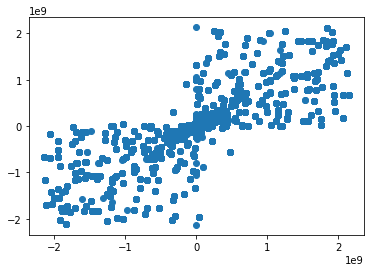

In [21]:
plt.scatter(mta['NO_OF_ENTRIES'],mta['NO_OF_EXITS'])

In [22]:
mask_negatives = (mta.NO_OF_ENTRIES >0) & (mta.NO_OF_EXITS >0)

In [23]:
mta = mta[mask_negatives]

In [24]:
count = (mta.NO_OF_EXITS < 0).sum()
count2 = (mta.NO_OF_ENTRIES < 0).sum()
print("no of exits :",count,"   "," no of entries :", count2)

no of exits : 0      no of entries : 0


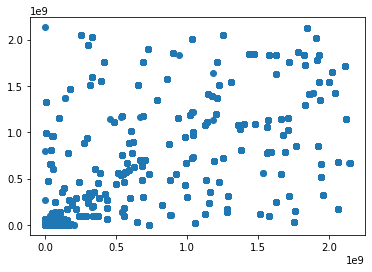

In [25]:
plt.scatter(mta['NO_OF_ENTRIES'],mta['NO_OF_EXITS'])

In [99]:
mta['NO_OF_ENTRIES'].mean()

1076650.0011422865

In [100]:
mta['NO_OF_EXITS'].mean()

913930.5307901176

In [105]:
entries_low = mta["NO_OF_ENTRIES"].quantile(0.015)
entries_hi  = mta["NO_OF_ENTRIES"].quantile(0.90)
exits_low = mta["NO_OF_EXITS"].quantile(0.015)
exits_hi  = mta["NO_OF_EXITS"].quantile(0.90)

In [106]:
mta_filtered = mta[(mta["NO_OF_ENTRIES"] < entries_hi) & (mta["NO_OF_EXITS"] < exits_hi)  ]

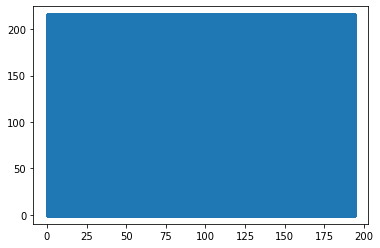

In [107]:
plt.scatter(mta_filtered['NO_OF_ENTRIES'],mta_filtered['NO_OF_EXITS'])

In [108]:
mta_filtered.NO_OF_EXITS.max()

214.0

C:\Users\osman\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NO_OF_ENTRIES', ylabel='Density'>

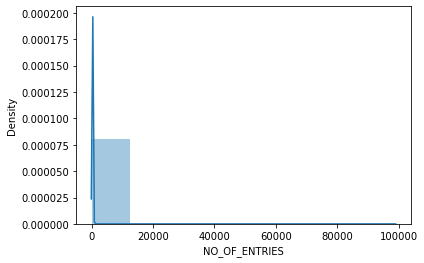

In [69]:
sns.distplot(mta_filtered['NO_OF_ENTRIES'],bins=8)

In [70]:
mta_filtered.shape

(4835022, 10)

In [73]:
mta.NO_OF_EXITS.mean()

913930.5307901176

In [74]:
from scipy.stats import zscore
mta['ENTRIES_Z_SCORES'] = zscore(mta['NO_OF_ENTRIES'])
mta['EXITS_Z_SCORES'] = zscore(mta['NO_OF_EXITS'])
mta.head()

,STATION,TURNSTILE,DATE,TIME,DATE_TIME,WEEKDAY,ENTRIES,EXITS,NO_OF_ENTRIES,NO_OF_EXITS,ENTRIES_Z_SCORES,EXITS_Z_SCORES
1,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,07:00:00,2021-02-27 07:00:00,Saturday,7537260,2570445,5.0,11.0,-0.029255,-0.027746
2,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,11:00:00,2021-02-27 11:00:00,Saturday,7537285,2570500,25.0,55.0,-0.029254,-0.027744
3,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,15:00:00,2021-02-27 15:00:00,Saturday,7537354,2570546,69.0,46.0,-0.029253,-0.027745
4,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,19:00:00,2021-02-27 19:00:00,Saturday,7537501,2570582,147.0,36.0,-0.029251,-0.027745
5,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,23:00:00,2021-02-27 23:00:00,Saturday,7537589,2570596,88.0,14.0,-0.029252,-0.027745


In [75]:
print(mta['ENTRIES_Z_SCORES'].mean())

-2.1252951735316353e-15


In [33]:
mta_filtered.head()

,STATION,TURNSTILE,DATE,TIME,DATE_TIME,WEEKDAY,ENTRIES,EXITS,NO_OF_ENTRIES,NO_OF_EXITS
1,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,07:00:00,2021-02-27 07:00:00,Saturday,7537260,2570445,5.0,11.0
2,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,11:00:00,2021-02-27 11:00:00,Saturday,7537285,2570500,25.0,55.0
3,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,15:00:00,2021-02-27 15:00:00,Saturday,7537354,2570546,69.0,46.0
4,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,19:00:00,2021-02-27 19:00:00,Saturday,7537501,2570582,147.0,36.0
5,59 ST,A002 R051 02-00-00 59 ST,02/27/2021,23:00:00,2021-02-27 23:00:00,Saturday,7537589,2570596,88.0,14.0


In [117]:
mta_filtered2 = mta[(mta.groupby('TURNSTILE')['NO_OF_ENTRIES'].apply(lambda x: (np.abs(x - x.mean())/ x.std()) < 1.96)) & (mta.groupby('TURNSTILE')['NO_OF_EXITS'].apply(lambda x: (np.abs(x - x.mean())/ x.std()) < 1.96))]

In [118]:
mta_filtered2.sort_values(by=['NO_OF_ENTRIES','NO_OF_EXITS'], ascending=False).head()

,STATION,TURNSTILE,DATE,TIME,DATE_TIME,WEEKDAY,ENTRIES,EXITS,NO_OF_ENTRIES,NO_OF_EXITS,ENTRIES_Z_SCORES,EXITS_Z_SCORES
58207,14 ST,N078 R175 01-00-03 14 ST,02/27/2021,00:00:00,2021-02-27 00:00:00,Saturday,2128707762,1154879702,2.120015e+09,1.143952e+09,57.575678,34.701356
267537,14 ST,N078 R175 01-00-03 14 ST,03/06/2021,00:00:00,2021-03-06 00:00:00,Saturday,2128706209,1154876298,2.120012e+09,1.143946e+09,57.575604,34.701169
476071,14 ST,N078 R175 01-00-03 14 ST,03/13/2021,00:00:00,2021-03-13 00:00:00,Saturday,2128704592,1154872875,2.120009e+09,1.143939e+09,57.575527,34.700979
684034,14 ST,N078 R175 01-00-03 14 ST,03/20/2021,01:00:00,2021-03-20 01:00:00,Saturday,2128702967,1154869373,2.120006e+09,1.143933e+09,57.575444,34.700780
893347,14 ST,N078 R175 01-00-03 14 ST,03/27/2021,01:00:00,2021-03-27 01:00:00,Saturday,2128701168,1154865573,2.120003e+09,1.143926e+09,57.575362,34.700571


In [113]:
mta_filtered2.NO_OF_ENTRIES.max()

2120014556.0

In [30]:
ax = sns.boxenplot(x='TRAFFIC', data=mta_entries_exits,palette="bright").set(xlabel='Daily Traffic',title="Daily Traffic Based On Turnstile")

NameError: name 'mta_entries_exits' is not defined

In [ ]:
mta_entries_exits.sort_values(by='TRAFFIC', ascending= True)

In [ ]:
mta.loc[mta['TURNSTILE'] == 'TRAM2 R469 00-05-01 RIT-ROOSEVELT']

In [ ]:
mta['NO_OF_ENTRIES'].min()

In [ ]:
mta.head()

In [ ]:
'''mt2 = pd.DataFrame(mta.groupby('TURNSTILE')).sort_values(by='DATE_TIME', inplace=True)
mta2['NO_OF_ENTRIES']= mta2['ENTRIES'].diff()
mta2['NO_OF_EXITS']= mta2['EXITS'].diff()'''

In [ ]:
mta.head()

In [ ]:
mta['NO_OF_ENTRIES'].min()

In [ ]:
mta['TURNSTILE_TRAFFIC'] = mta['NO_OF_ENTRIES'] + mta['NO_OF_EXITS']
mta.describe()

In [ ]:
mta.sort_values(by='TURNSTILE_TRAFFIC').head()

In [ ]:
#Finding maximum and minimum date in dataframe

print("Maximum date: ")
print(mta["DATE_TIME"].max(),'\n')
print("Minimum date: ")
print(mta["DATE_TIME"].min())

In [ ]:
mta.isnull().sum()

In [ ]:
mta = mta.dropna()
mta.isnull().sum()

In [ ]:
mta.groupby(['TURNSTILE','DATE']).sum().sort_values(ascending=False, by='TURNSTILE_TRAFFIC')